In [57]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import datetime as dt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [6]:
csv_path_btc_supply = Path('../crypto_bot_project_2/Data/total-bitcoins.csv')
btc_supply_df = pd.read_csv(csv_path_btc_supply)
btc_supply_df.head()

,Timestamp,total-bitcoins
0,2009-01-03 17:15:05,50.0
1,2009-01-14 09:09:42,21950.0
2,2009-01-18 03:44:10,43850.0
3,2009-01-22 05:56:59,65750.0
4,2009-01-25 08:27:01,87650.0


In [13]:
btc_supply_df['Date'] = pd.to_datetime(btc_supply_df['Timestamp']).dt.date
btc_supply_df = btc_supply_df.set_index('Date')
btc_supply_df.head()

,Timestamp,total-bitcoins
Date,,
2009-01-03,2009-01-03 17:15:05,50.0
2009-01-14,2009-01-14 09:09:42,21950.0
2009-01-18,2009-01-18 03:44:10,43850.0
2009-01-22,2009-01-22 05:56:59,65750.0
2009-01-25,2009-01-25 08:27:01,87650.0


In [40]:
csv_path_btc_price = Path('../crypto_bot_project_2/Data/BTC-USD.csv')
btc_price_df = pd.read_csv(csv_path_btc_price)
btc_price_df['Date'] = pd.to_datetime(btc_price_df['Date']).dt.date
btc_price_df = btc_price_df.set_index('Date')
btc_price_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [66]:
btc_df = btc_supply_df.join(btc_price_df, how = 'outer')

start_date = dt.date(2014, 9, 17)
btc_df = btc_df.loc[start_date:]
btc_df.head()

,Timestamp,total-bitcoins,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,
2014-09-17,2014-09-17 22:08:53,13280850.0,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,NaN,NaN,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,NaN,NaN,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,2014-09-20 16:12:15,13292775.0,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,NaN,NaN,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [83]:
btc_df['Circulating Supply'] = btc_df['total-bitcoins'].ffill()
btc_df = btc_df.drop(columns = ['Timestamp', 'total-bitcoins'])
btc_df.head()

,Open,High,Low,Close,Adj Close,Volume,Circulating Supply
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,13280850.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,13280850.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,13280850.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,13292775.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,13292775.0


In [95]:
btc_df['Max Supply'] = 21000000
btc_df['Supply Ratio'] = (btc_df['Circulating Supply'] / btc_df['Max Supply']) * 100
btc_df.head()

,Open,High,Low,Close,Adj Close,Volume,Circulating Supply,Max Supply,Supply Ratio
Date,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,13280850.0,21000000,63.242143
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,13280850.0,21000000,63.242143
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,13280850.0,21000000,63.242143
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,13292775.0,21000000,63.298929
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,13292775.0,21000000,63.298929


In [101]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
btc_df['fast_supply'] = btc_df['Supply Ratio'].ewm(halflife=short_window).mean()
btc_df['slow_supply'] = btc_df['Supply Ratio'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
btc_df['crossover_long_supply'] = np.where(btc_df['fast_supply'] > btc_df['slow_supply'], 1.0, 0.0)
btc_df['crossover_short_supply'] = np.where(btc_df['fast_supply'] < btc_df['slow_supply'], -1.0, 0.0)
btc_df['crossover_signal_supply'] = btc_df['crossover_long_supply'] + btc_df['crossover_short_supply']

btc_df.head()

,Open,High,Low,Close,Adj Close,Volume,Circulating Supply,Max Supply,Supply Ratio,fast_supply,slow_supply,crossover_long_supply,crossover_short_supply,crossover_signal_supply
Date,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,13280850.0,21000000,63.242143,63.242143,63.242143,0.0,0.0,0.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,13280850.0,21000000,63.242143,63.242143,63.242143,0.0,0.0,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,13280850.0,21000000,63.242143,63.242143,63.242143,0.0,0.0,0.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,13292775.0,21000000,63.298929,63.272429,63.257848,1.0,0.0,1.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,13292775.0,21000000,63.298929,63.286106,63.267240,1.0,0.0,1.0


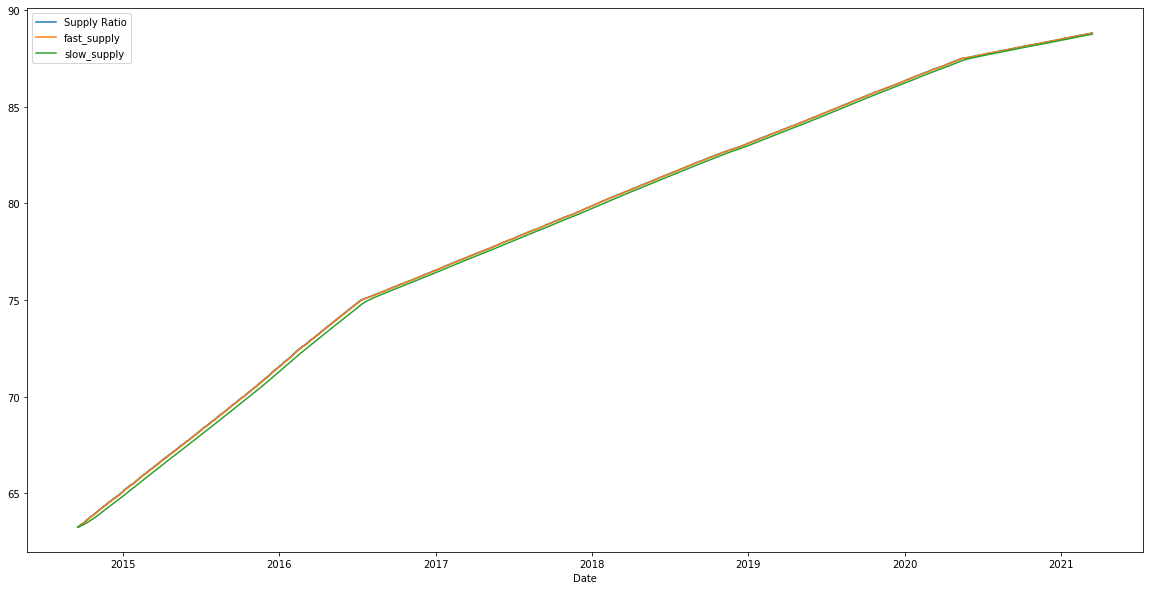

In [102]:
btc_df[['Supply Ratio', 'fast_supply', 'slow_supply']].plot(kind = 'line', figsize = (20, 10))

In [104]:
csv_path = Path('../crypto_bot_project_2/Data/BTC_supply.csv')
btc_supply_df = btc_df.to_csv(csv_path)
